In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics pycocotools -q
print("✅ Ultralytics and Pycocotools installed successfully.")


import os
import yaml
import torch
import glob
from ultralytics import RTDETR
from IPython.display import Image, display

✅ Ultralytics and Pycocotools installed successfully.


In [3]:
print("\nPyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Using device:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("CUDA not available, using CPU. This will be very slow.")


PyTorch version: 2.6.0+cu124
CUDA available: True
Using device: Tesla T4


In [4]:
# Define the path to the dataset on Kaggle
dataset_base_path = '/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8'

# Create the data configuration dictionary for 3 classes
data_config = {
    'path': dataset_base_path,
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': {
        0: 'glioma',
        1: 'meningioma',
        2: 'pituitary'
    }
}

# Write the dictionary to a YAML file in the current working directory
config_path = './brain_tumor_data.yaml'
with open(config_path, 'w') as f:
    yaml.dump(data_config, f, default_flow_style=None)

print("\nDataset configuration file created at:", config_path)


Dataset configuration file created at: ./brain_tumor_data.yaml


In [5]:
# Load a pre-trained RT-DETR-L model (a large, accurate variant).
# This will serve as our YOLOv12 baseline.
model = RTDETR('rtdetr-l.pt')

print("\n🚀 Starting YOLOv12 (RT-DETR) training...")
# Train the model using the Python API
# Epochs are set to 20 for a test run. Increase to 50+ for the final project with DETR models.
results = model.train(
    data=config_path,
    epochs=20,
    imgsz=640,
    batch=-1,  # Auto-batch size
    device=0,
    project='yolov12_training',
    name='brain_tumor_baseline_rtdetr'
)



🚀 Starting YOLOv12 (RT-DETR) training...
Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./brain_tumor_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=brain_tumor_baseline_rtdetr, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       1/20      2.88G      0.597      4.354     0.3627          4        640: 100% ━━━━━━━━━━━━ 715/715 2.8it/s 4:16s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.3it/s 13.9s
                   all        612        612       0.69      0.353      0.384       0.27

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       2/20      3.06G     0.4743     0.7716     0.1932          4        640:   0% ──────────── 0/715  0.3s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       2/20      3.06G     0.4739     0.7961     0.2656          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:10s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.0s
                   all        612        612      0.749       0.68      0.705      0.508

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       3/20      3.23G     0.4209     0.9291     0.1862          6        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       3/20      3.23G     0.4726     0.7928     0.2706          6        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:09s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.1s
                   all        612        612      0.707      0.676      0.706       0.52

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       4/20      3.44G      0.173     0.5121     0.1093          3        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       4/20      3.44G     0.4413     0.7367     0.2479          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:10s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.7it/s 13.2s
                   all        612        612      0.818      0.681      0.731      0.528

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       5/20       3.6G     0.6688     0.7598     0.3527          3        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       5/20      3.61G     0.4437     0.7868     0.2561          3        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:08s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.1s
                   all        612        612      0.703      0.654      0.703      0.522

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       6/20      3.82G     0.8479     0.8274     0.5875          5        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       6/20      3.82G     0.4396     0.7571     0.2496          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:08s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.1s
                   all        612        612      0.794      0.669      0.738      0.541

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       7/20      3.98G      0.498      1.154     0.1589          5        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       7/20      3.98G     0.4231     0.7025     0.2371          4        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:09s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.1s
                   all        612        612      0.822      0.763      0.803      0.587

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       8/20       4.2G     0.3459     0.5194     0.1453          3        640:   0% ──────────── 0/715  0.3s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       8/20       4.2G     0.4014       0.67     0.2272          3        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:08s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.0s
                   all        612        612      0.814      0.636      0.652      0.492

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       9/20      4.38G     0.3027     0.8356     0.1154          6        640:   0% ──────────── 0/715  0.3s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       9/20      4.38G      0.397     0.6595     0.2232          3        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:08s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.2s
                   all        612        612      0.835      0.782      0.834      0.617

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      10/20      4.57G     0.4546     0.7894     0.2643          6        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      10/20      4.58G      0.377     0.6172     0.2058          4        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:08s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.1s
                   all        612        612      0.848      0.809      0.857      0.623
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      11/20      4.61G     0.3046      0.659     0.1874          3        640:   0% ──────────── 0/715  0.5s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      11/20      4.78G       0.33     0.5211      0.218          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:10s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.2s
                   all        612        612      0.847      0.815      0.857       0.64

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      12/20      4.92G     0.1639     0.9782     0.1243          3        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      12/20      4.94G     0.3098      0.502     0.1987          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:09s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.9it/s 13.0s
                   all        612        612      0.857      0.699      0.717      0.541

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      13/20      5.15G     0.4066     0.3436     0.1435          3        640:   0% ──────────── 0/715  0.3s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      13/20      5.15G     0.3108     0.4587     0.2019          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:09s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.7it/s 13.2s
                   all        612        612      0.876      0.891      0.905      0.675

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      14/20      5.32G     0.2637     0.3036     0.3204          3        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      14/20      5.32G     0.2946     0.4395     0.1907          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:10s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.7it/s 13.2s
                   all        612        612      0.906      0.872      0.905      0.678

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      15/20      5.53G     0.3726     0.3857     0.2525          3        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      15/20      5.53G     0.2878     0.4252     0.1866          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:10s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.2s
                   all        612        612      0.904      0.857      0.909      0.679

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      16/20       5.7G     0.5964     0.6196      0.391          3        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      16/20       5.7G     0.2833     0.3968     0.1846          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:09s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.1s
                   all        612        612      0.891      0.884      0.907      0.678

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      17/20      5.91G     0.2626     0.3692     0.2417          3        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      17/20      5.91G     0.2733     0.3863     0.1725          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:09s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.2s
                   all        612        612      0.903      0.873      0.904      0.679

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      18/20       6.1G     0.1279     0.2464     0.0443          3        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      18/20       6.1G     0.2658     0.3592     0.1698          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:09s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.8it/s 13.1s
                   all        612        612      0.906      0.882      0.908      0.695

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      19/20      6.31G     0.2101     0.2919    0.06102          3        640:   0% ──────────── 0/715  0.3s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      19/20      6.31G     0.2505     0.3483     0.1574          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:09s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.7it/s 13.2s
                   all        612        612      0.903      0.903      0.919      0.699

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      20/20      6.44G     0.1736     0.2902    0.05489          3        640:   0% ──────────── 0/715  0.4s

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      20/20      6.47G     0.2442      0.338      0.155          2        640: 100% ━━━━━━━━━━━━ 715/715 2.9it/s 4:10s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 7.7it/s 13.2s
                   all        612        612      0.921      0.897       0.92      0.701

20 epochs completed in 1.468 hours.
Optimizer stripped from yolov12_training/brain_tumor_baseline_rtdetr/weights/last.pt, 66.1MB
Optimizer stripped from yolov12_training/brain_tumor_baseline_rtdetr/weights/best.pt, 66.1MB

Validating yolov12_training/brain_tumor_baseline_rtdetr/weights/best.pt...
Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,989,905 parameters, 0 gradients, 103.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 102/102 8.3it/s 12.4s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        612        612      0.922      0.896      0.921      0.703
                glioma        285        285      0.848      0.785       0.83      0.559
            meningioma        142        142      0.961      0.958      0.964       0.81
             pituitary        185        185      0.956      0.945       0.97      0.739
Speed: 0.2ms preprocess, 16.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to yolov12_training/brain_tumor_baseline_rtdetr


In [6]:
print("\n🔎 Starting YOLOv12 (RT-DETR) validation on the test set...")
# The 'train' method returns the best model, so we can use that object directly.
val_results = model.val(
    split='test',
    project='yolov12_validation',
    name='test_results_rtdetr'
)


🔎 Starting YOLOv12 (RT-DETR) validation on the test set...
Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,989,905 parameters, 0 gradients, 103.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9.1±1.9 MB/s, size: 31.1 KB)
val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/labels... 308 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 308/308 221.6it/s 1.4s
WARNING ⚠️ val: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 103/103 6.9it/s 15.0s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        308        308       0.91      0.883      0.923      0.699
                glioma        159        159      0.825      0.767      0.842      0.553
            meningioma         62         62      0.933      0.952      0.957      0.812
             pituitary         87         87      0.973      0.931       0.97      0.733
Speed: 0.5ms preprocess, 44.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to yolov12_validation/test_results_rtdetr


In [7]:
# The 'results.save_dir' attribute contains the path to all output files.
results_dir = results.save_dir
print(f"\n📂 --- Displaying results from: {results_dir} ---")

# 6.1 Debug: List all files in the results directory
print("\n[Debug] Files found in results directory:")
for f in os.listdir(results_dir):
    print(f"- {f}")


📂 --- Displaying results from: yolov12_training/brain_tumor_baseline_rtdetr ---

[Debug] Files found in results directory:
- BoxPR_curve.png
- val_batch1_labels.jpg
- val_batch2_labels.jpg
- train_batch7151.jpg
- confusion_matrix.png
- results.csv
- val_batch2_pred.jpg
- train_batch2.jpg
- val_batch1_pred.jpg
- confusion_matrix_normalized.png
- train_batch1.jpg
- train_batch7150.jpg
- labels.jpg
- train_batch0.jpg
- train_batch7152.jpg
- val_batch0_pred.jpg
- results.png
- BoxF1_curve.png
- args.yaml
- weights
- val_batch0_labels.jpg
- BoxP_curve.png
- BoxR_curve.png



📊 Training & Validation Metrics (Loss, mAP, etc.)


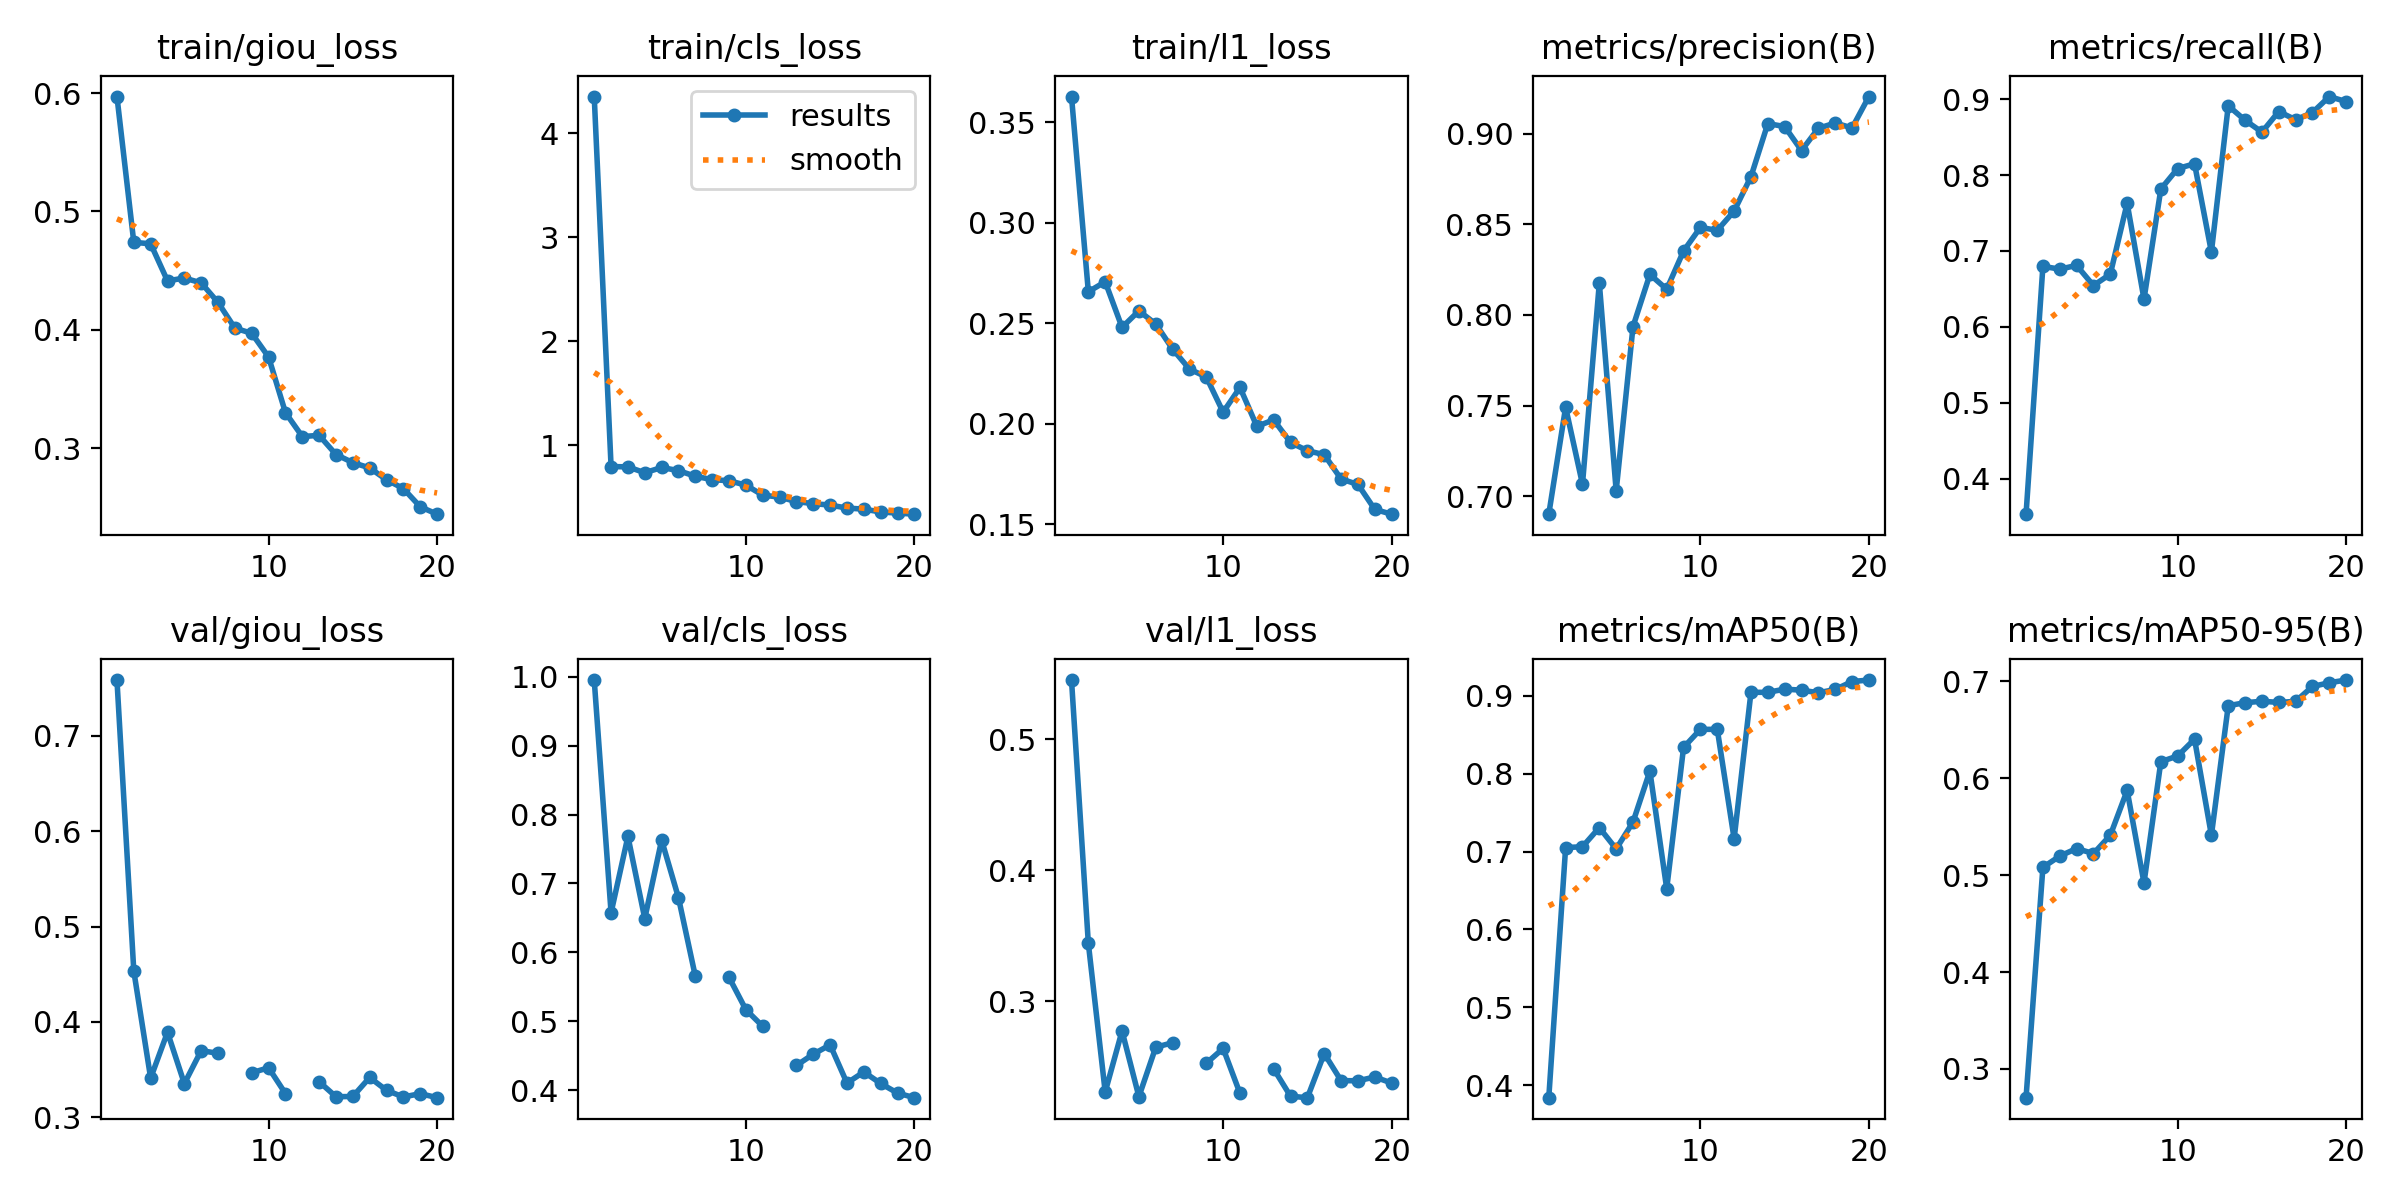

In [9]:
# 6.2 Training & Validation Metrics
results_plot_path = os.path.join(results_dir, 'results.png')
if os.path.exists(results_plot_path):
    print("\n📊 Training & Validation Metrics (Loss, mAP, etc.)")
    display(Image(filename=results_plot_path, width=1200))
else:
    print(f"Could not find results plot at: {results_plot_path}")


🔀 Confusion Matrix


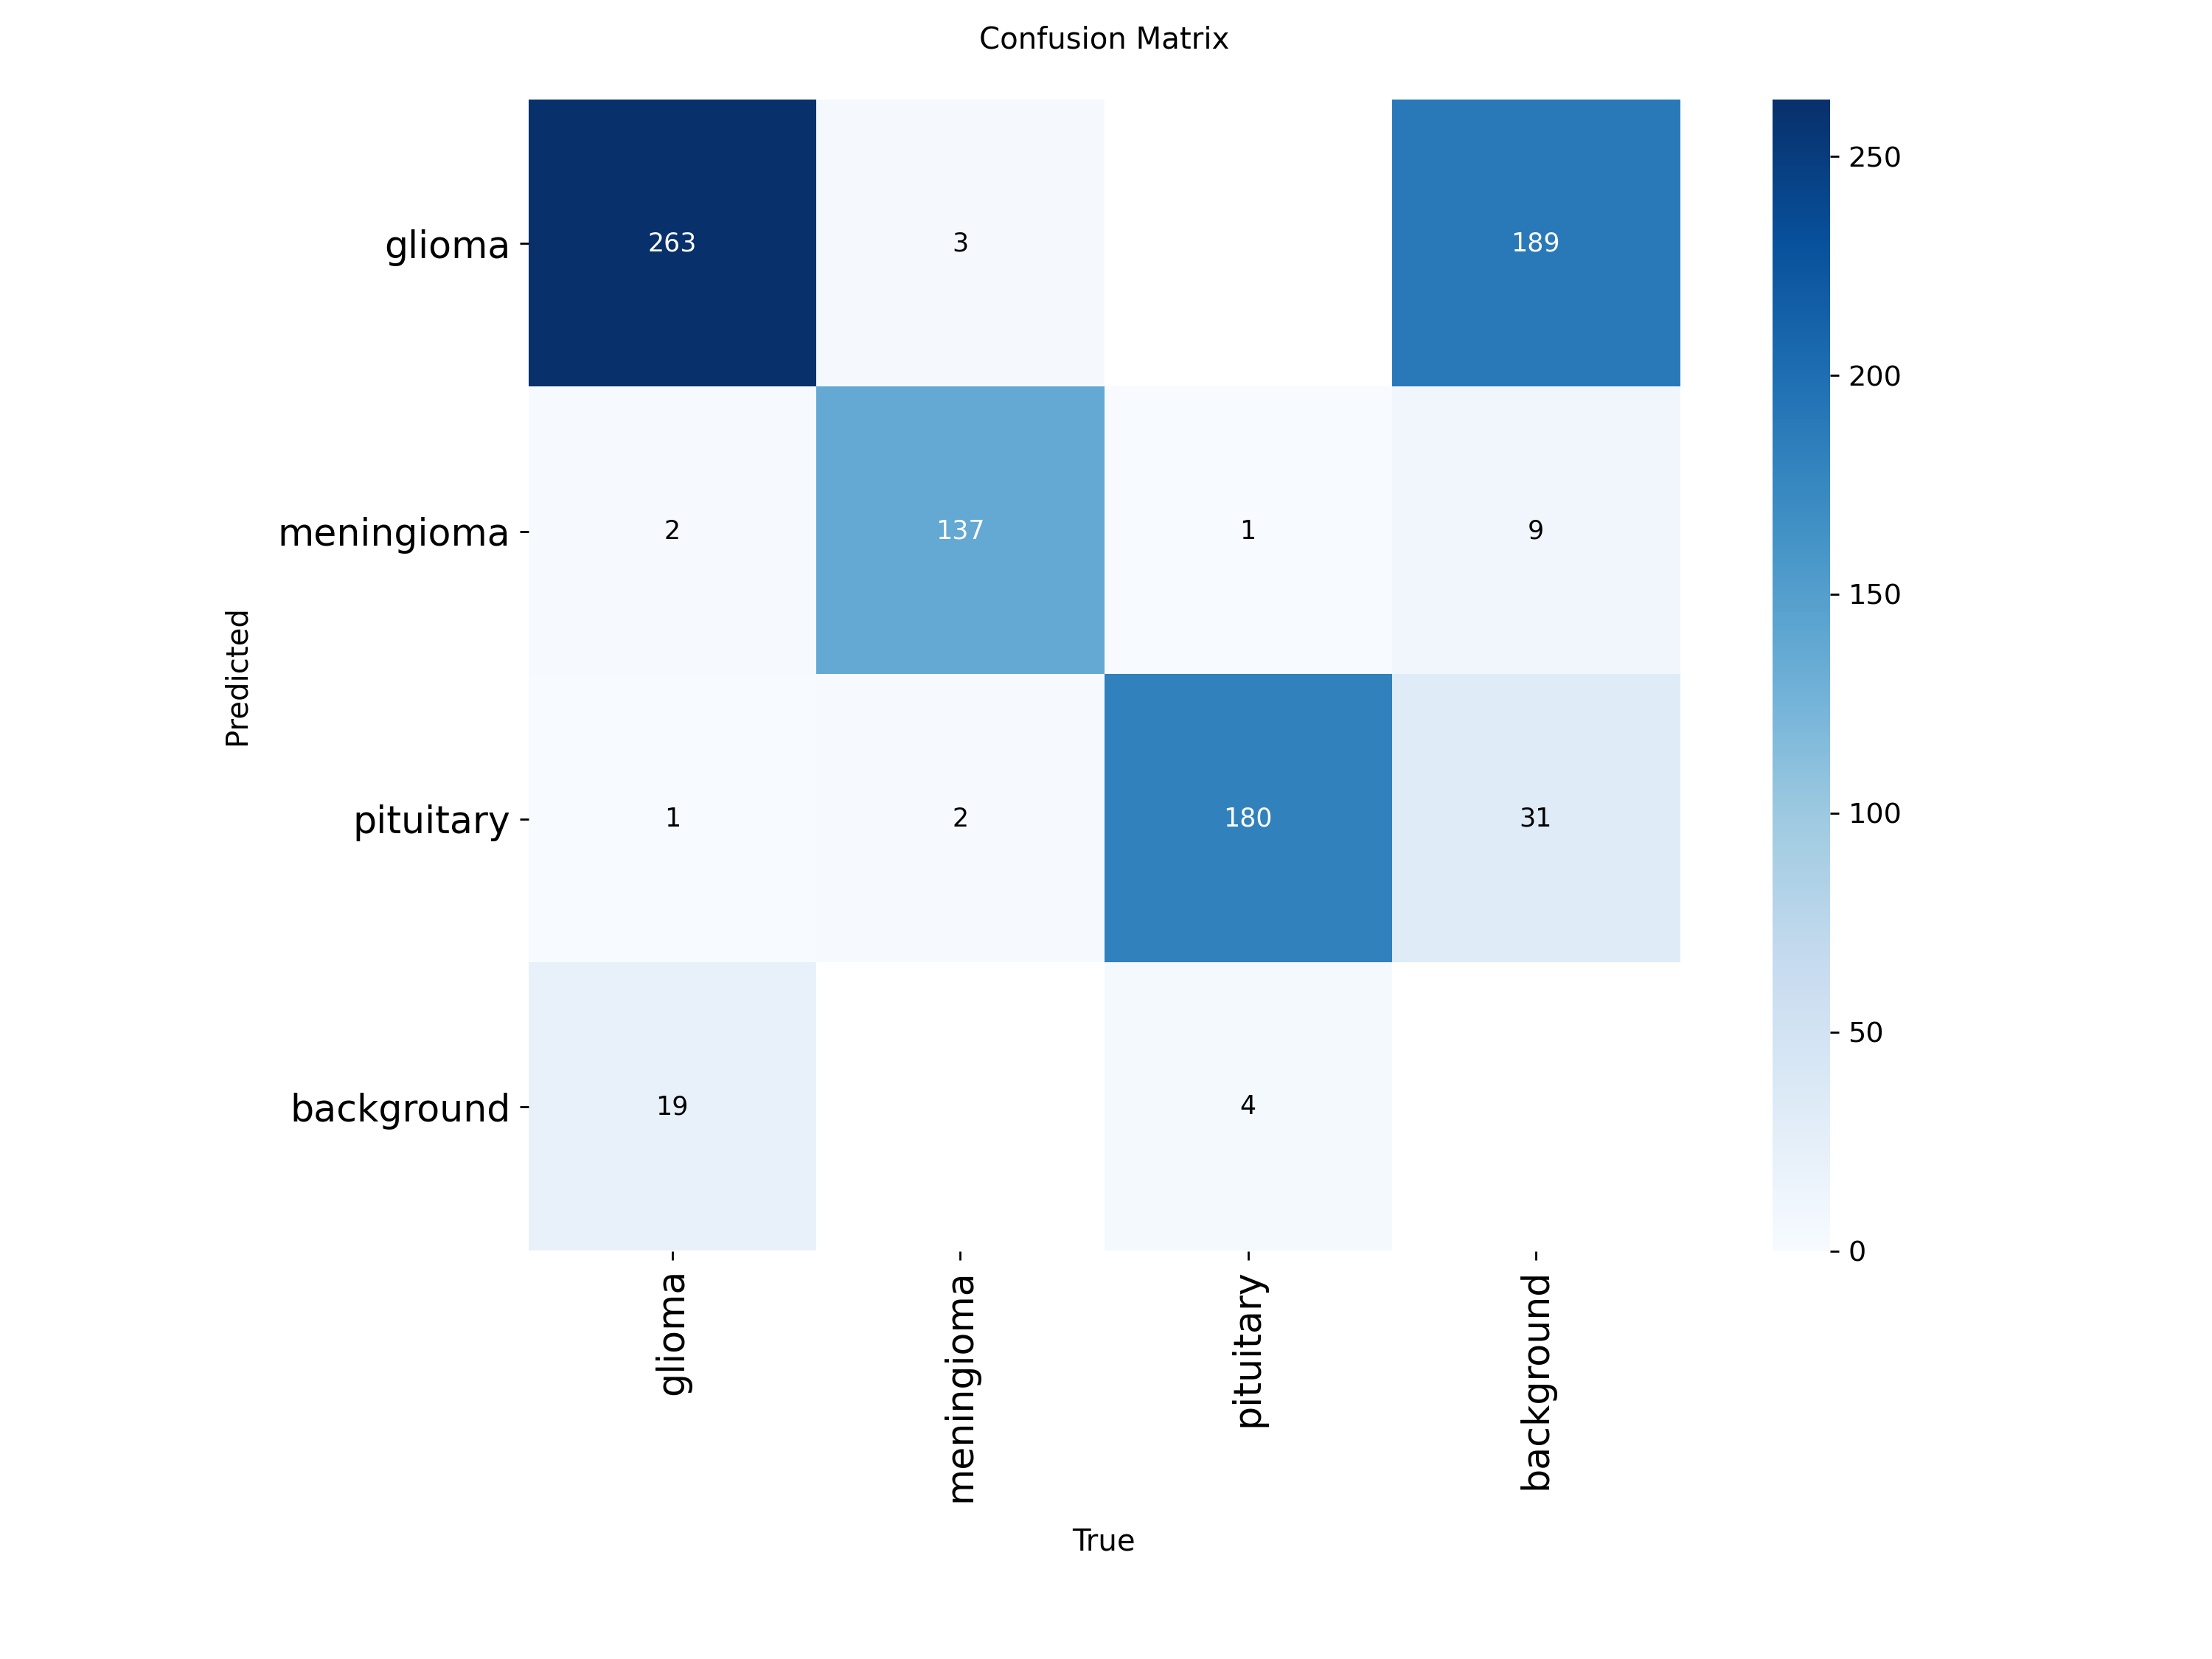

In [11]:
# 6.3 Confusion Matrix
confusion_matrix_path = os.path.join(results_dir, 'confusion_matrix.png')
if os.path.exists(confusion_matrix_path):
    print("\n🔀 Confusion Matrix")
    display(Image(filename=confusion_matrix_path, width=1000))
else:
    print(f"Could not find confusion matrix at: {confusion_matrix_path}")


📈 Precision-Recall (PR) Curve


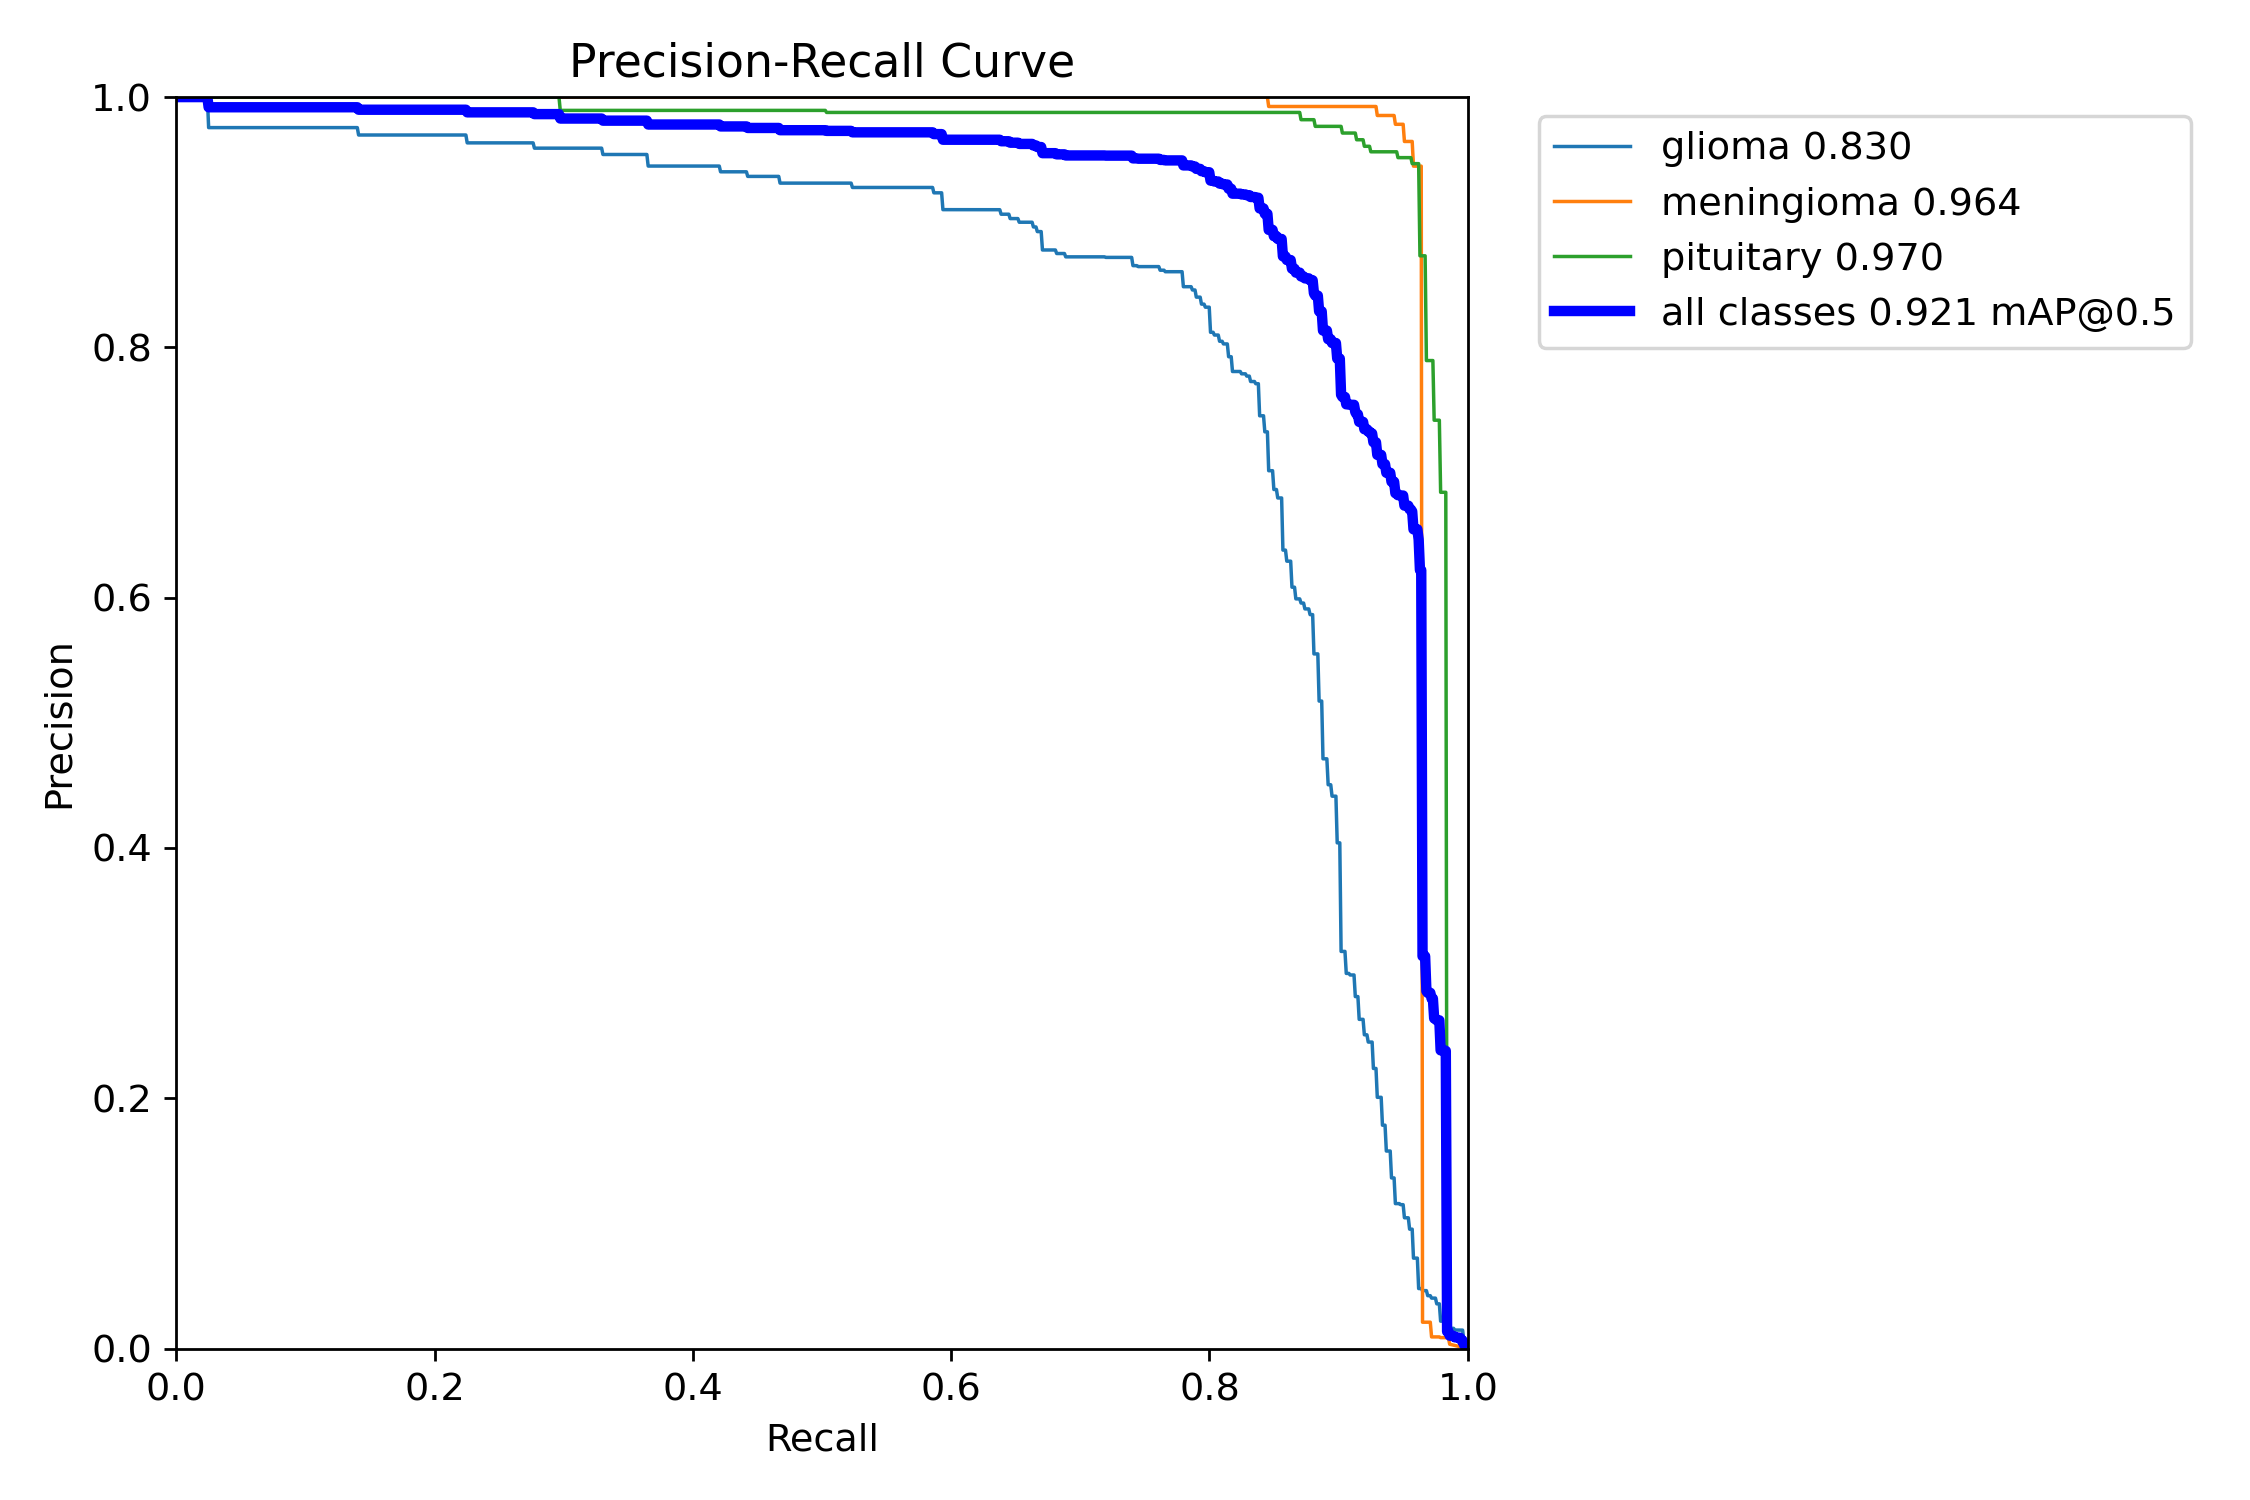

In [13]:
# 6.4 Precision-Recall (PR) Curve
pr_curve_path = glob.glob(os.path.join(results_dir, '*PR_curve.png'))
if pr_curve_path:
    print("\n📈 Precision-Recall (PR) Curve")
    display(Image(filename=pr_curve_path[0], width=800))
else:
    print(f"Could not find PR curve. Looking for files ending with '_PR_curve.png'")


 Sample Predictions from Validation


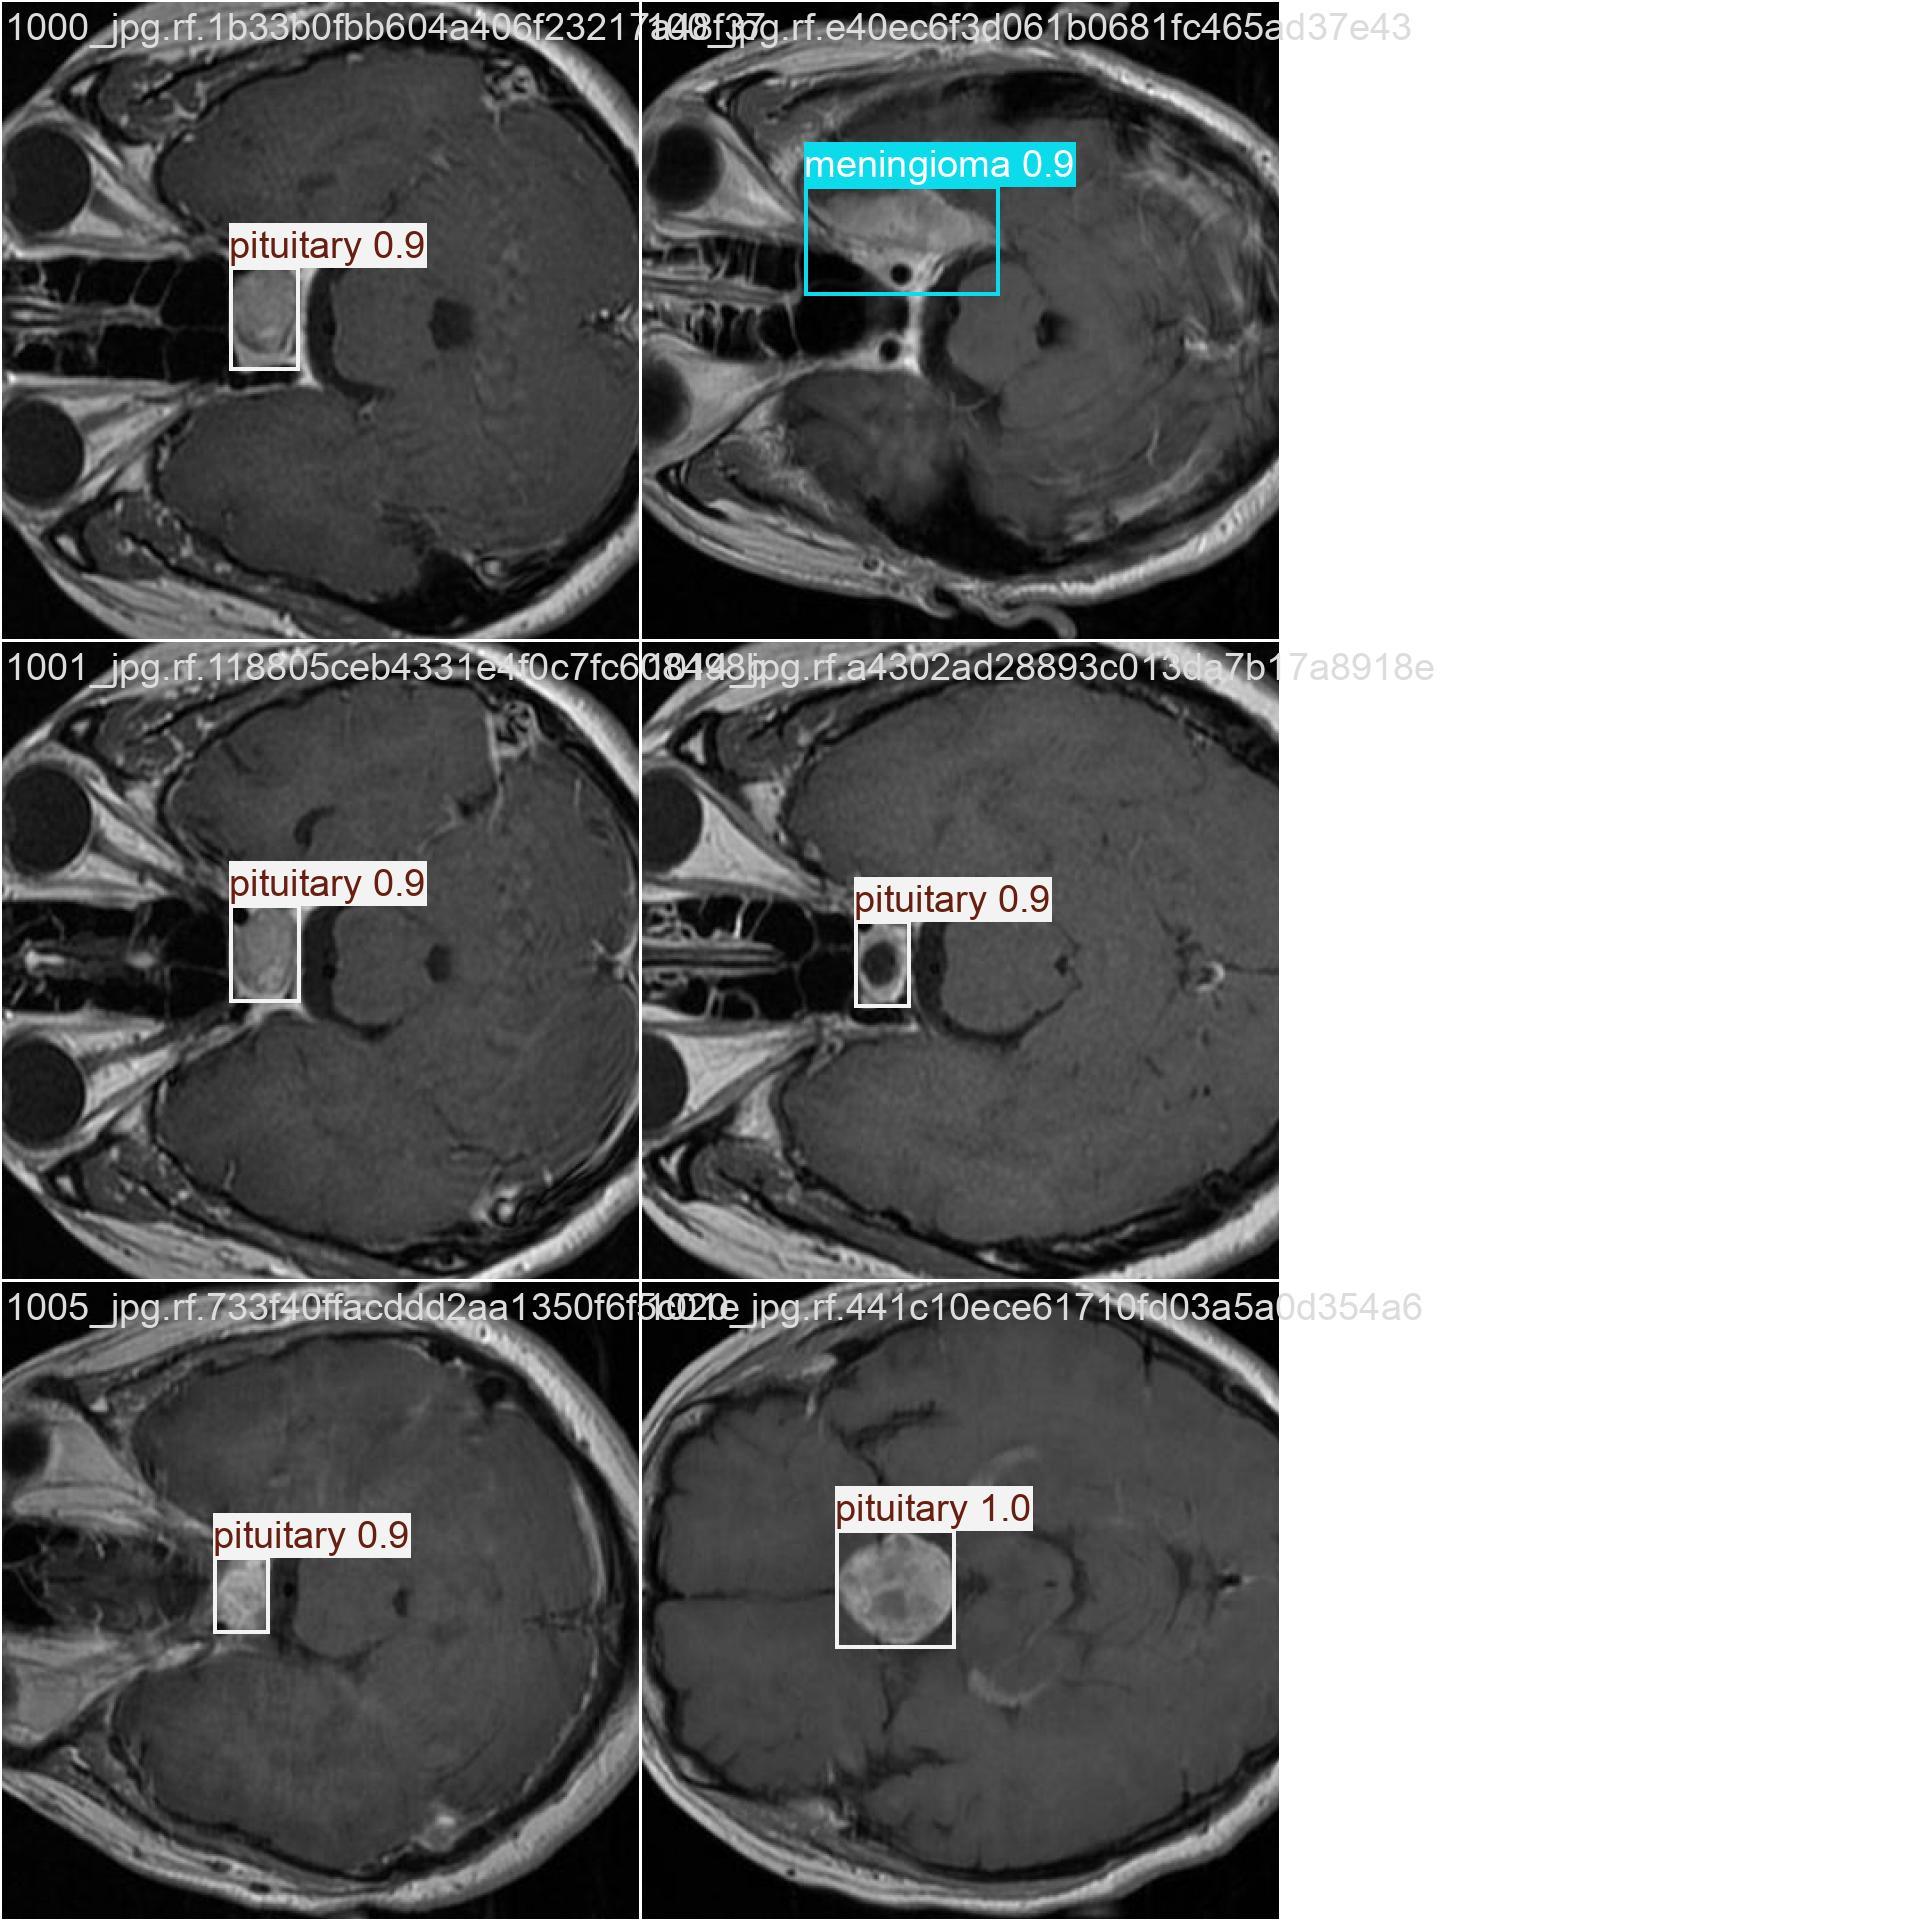

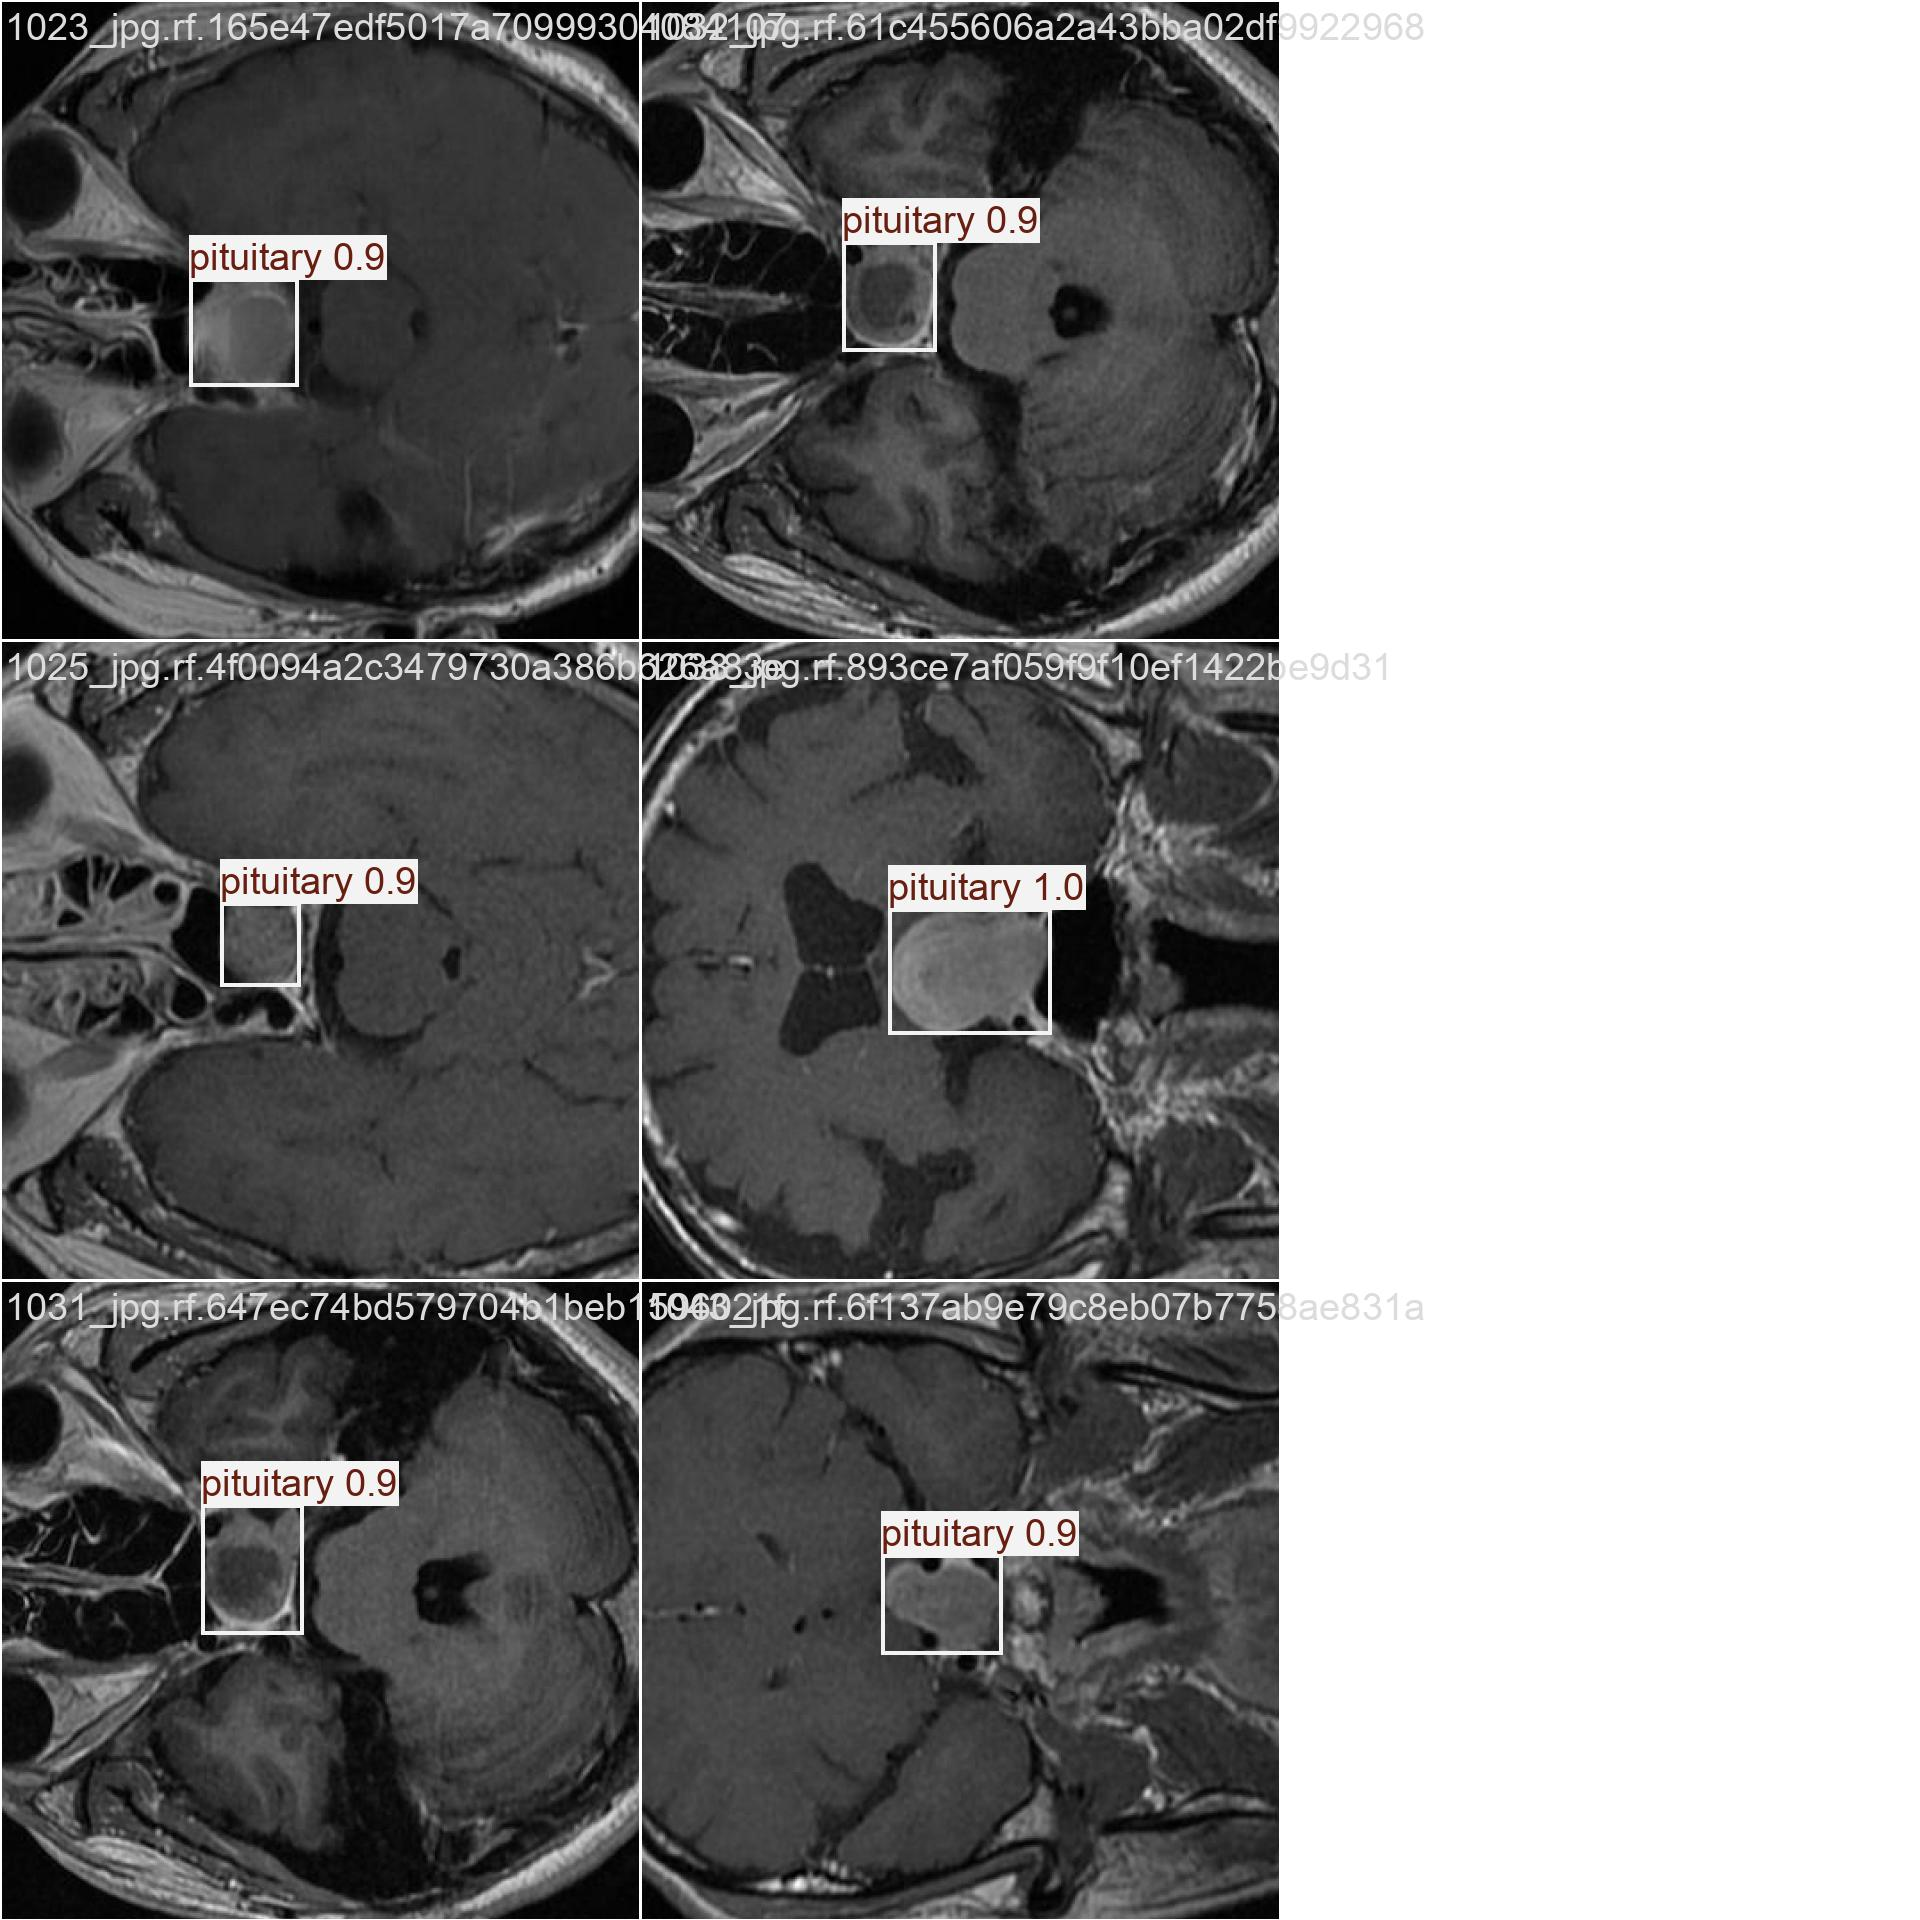

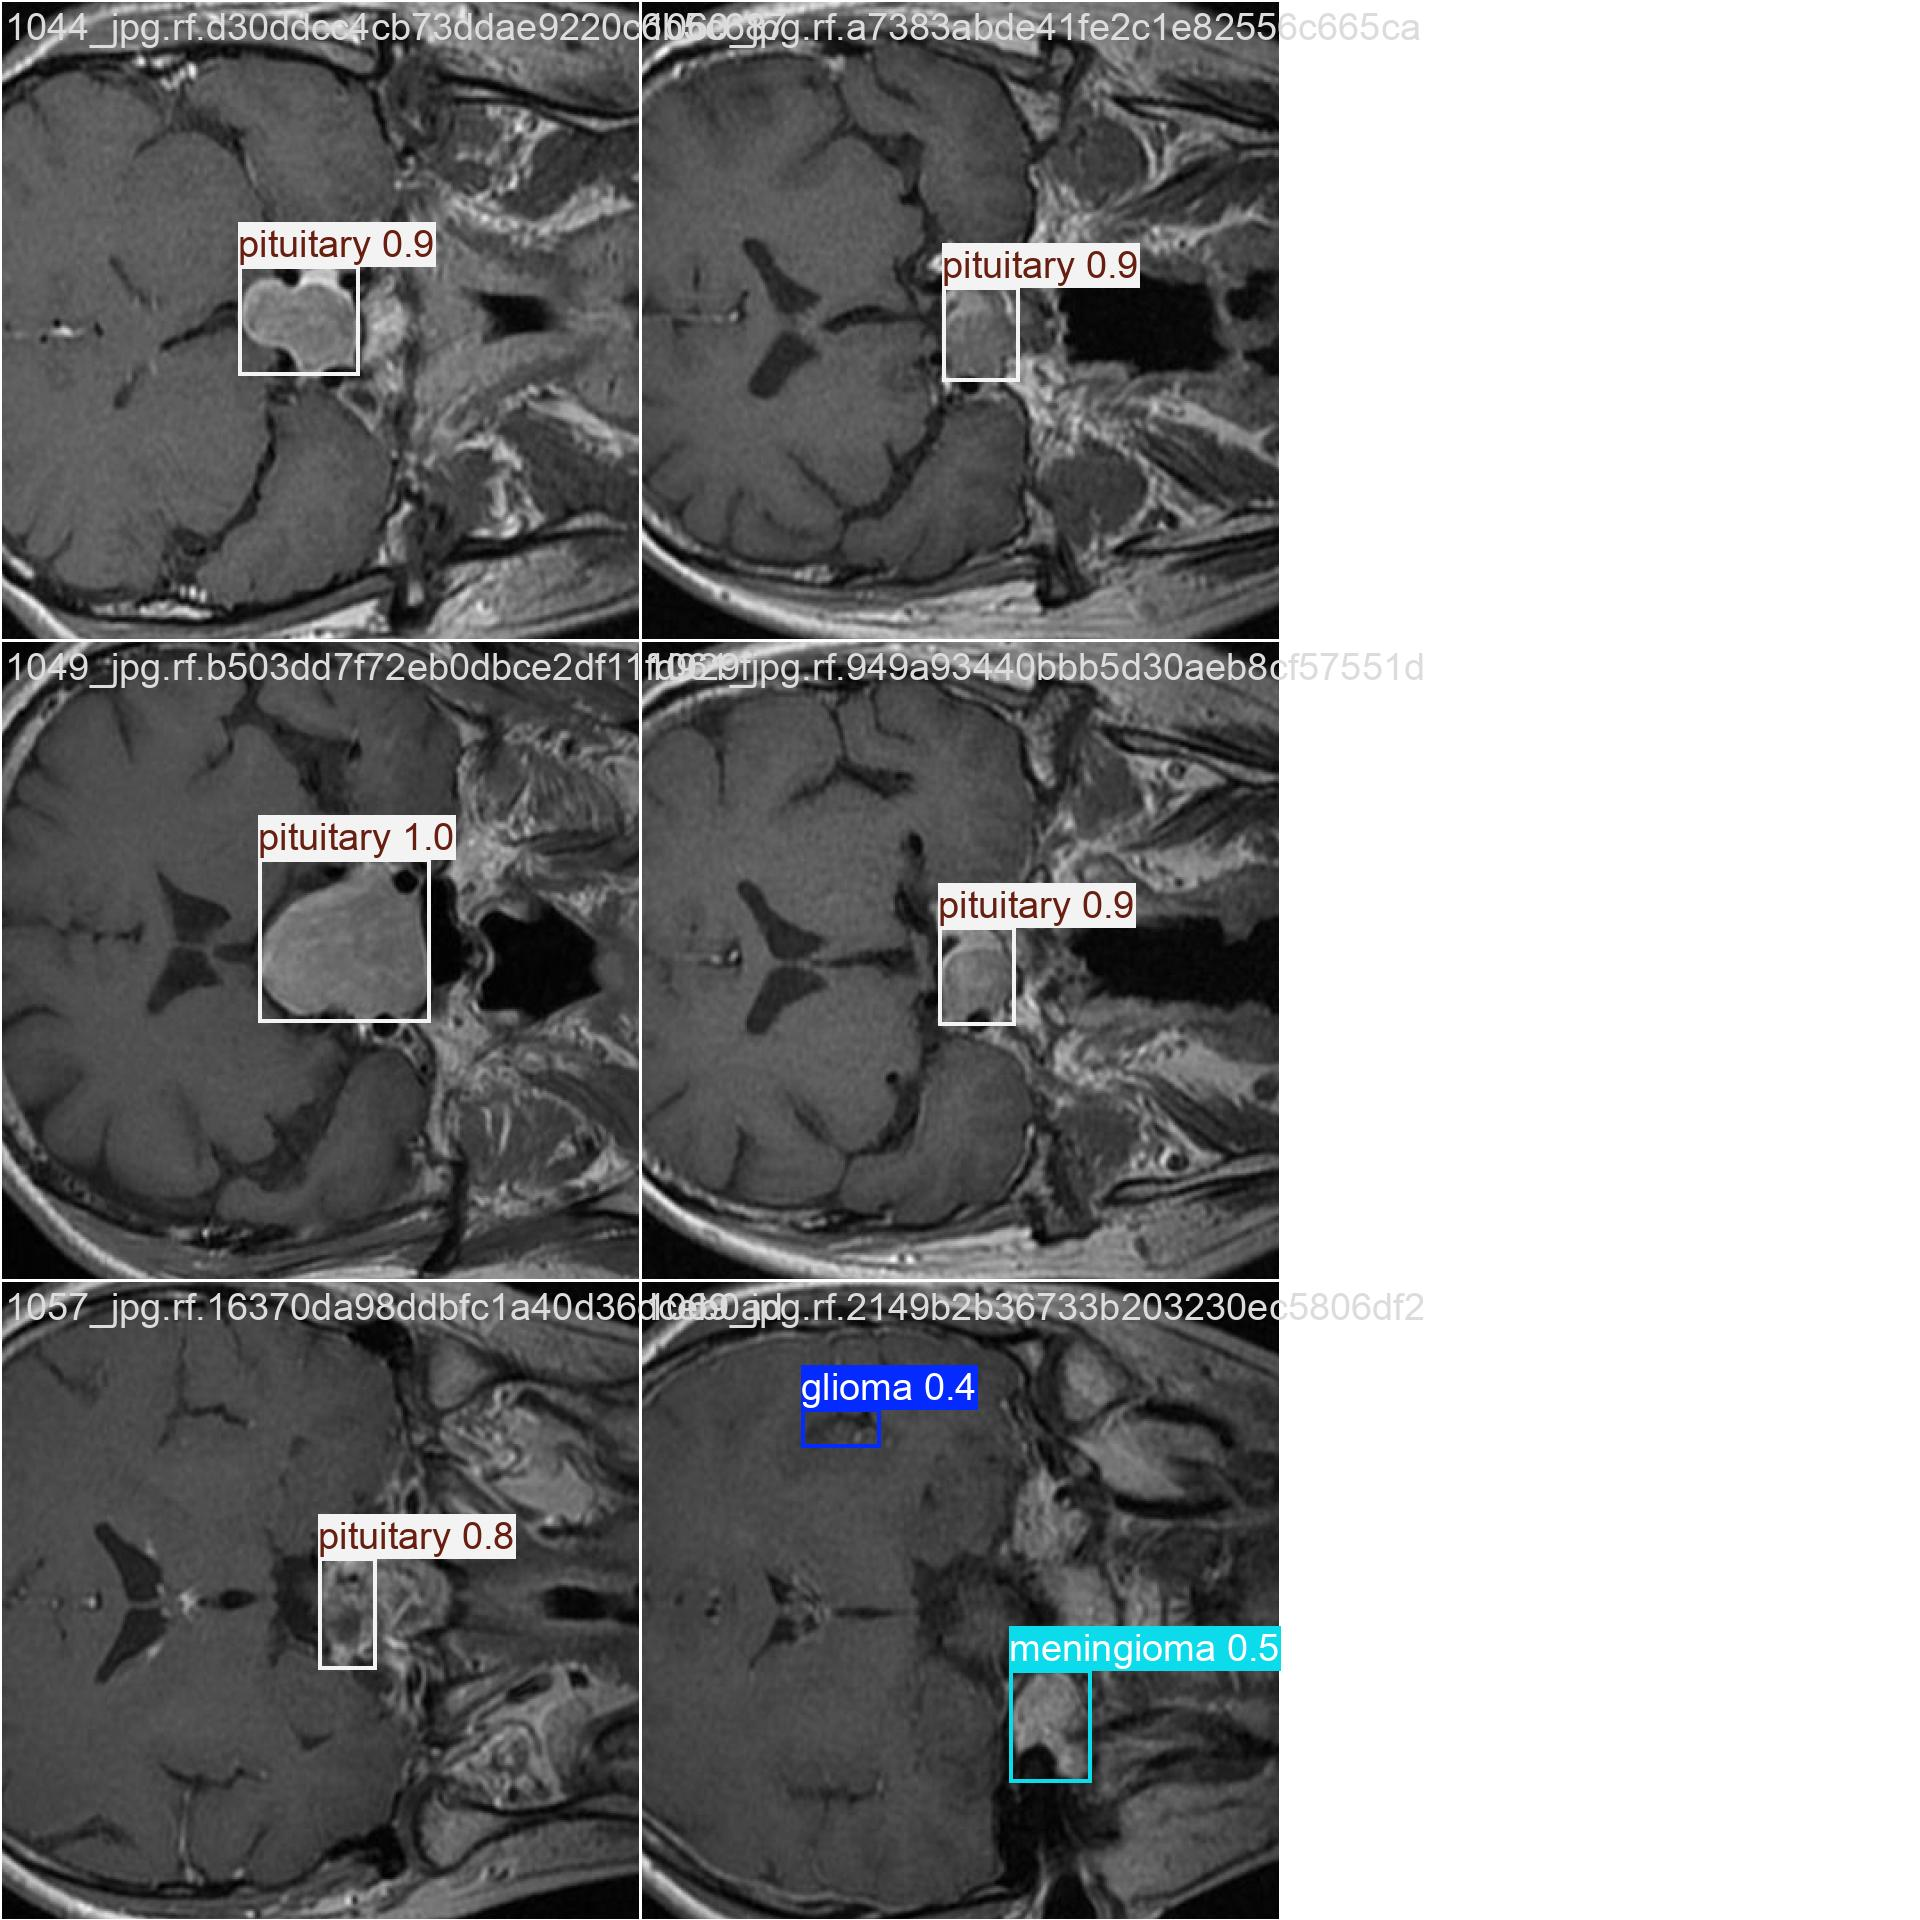

In [15]:

# 6.5 Qualitative Results (Validation Batch Images)
print("\n Sample Predictions from Validation")
val_batch_images = glob.glob(os.path.join(results_dir, 'val_batch*_pred.jpg'))
if val_batch_images:
    for img_path in sorted(val_batch_images)[:3]: # Display first 3 batches
        display(Image(filename=img_path))
else:
    print("No validation batch images found.")